# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 2. Teorie - před odevzdáním prosíme smazat včetně ilustračních obrázků.

Pokud znáte základní teorii okolo EKG signálů, můžete tuhle část přeskočit. Teorie je doopravdy stručná, neboť teorie EKG není cílem tohoto předmětu.

EKG signál má několik základních částí:
  

1.   P vlnu, která značí počátek kontrakce předsíní
2.   QRS komplex vln, který vzniká depolarizací komor (jejich stažením)
3.   T vlna jako poslední představuje repolarizaci komor (tedy jejich zpětné roztažení)

Nás bude zajímat především QRS komplex, který se ve spektru nachází mezi 10 Hz a 20 Hz. Z polohy QRS lze určit RR interval - vzdálenost mezi jednotlivými R vlnami. RR interval je přímo spojený se srdečním tepem. Na obrázku spektra EKG signálu můžete také vidět, na kterých frekvencích se nachází P a T vlna, kterou my ale v projektu odfiltrujeme.

EKG se snímá v několika základních rozloženích elektrodových svodů. V nemocnici se potkáte nejčastěji s 12 svodovým EKG. V projektu dostanete jeden z těchto svodů.


#### Popis EKG





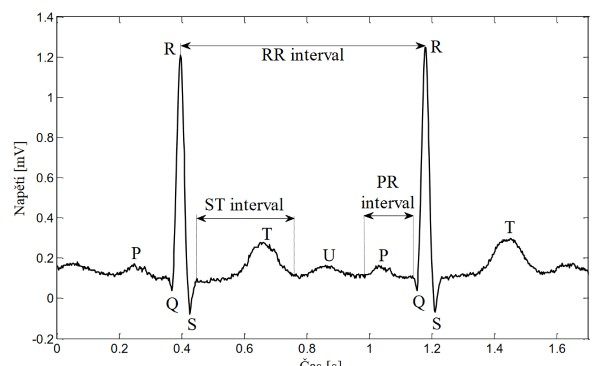

#### EKG ve spektru

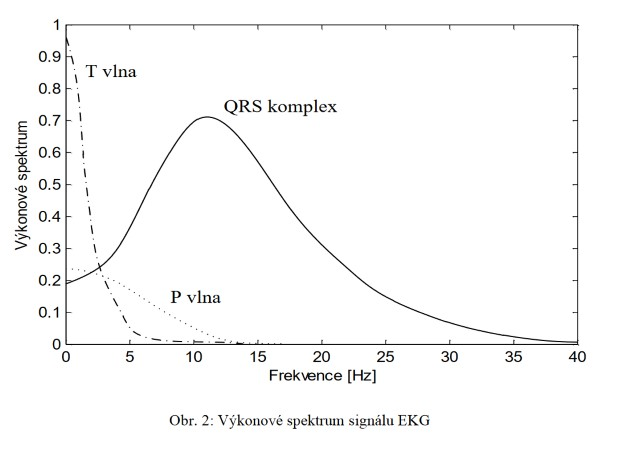

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [55]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xsmirn02.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

--2023-12-17 22:33:46--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xsmirn02.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xsmirn02.wav.2’

xsmirn02.wav.2      100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 22:33:48 (118 MB/s) - ‘xsmirn02.wav.2’ saved [10044/10044]

--2023-12-17 22:33:48--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav.2’

FIB.wav.2           100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-1

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu



 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

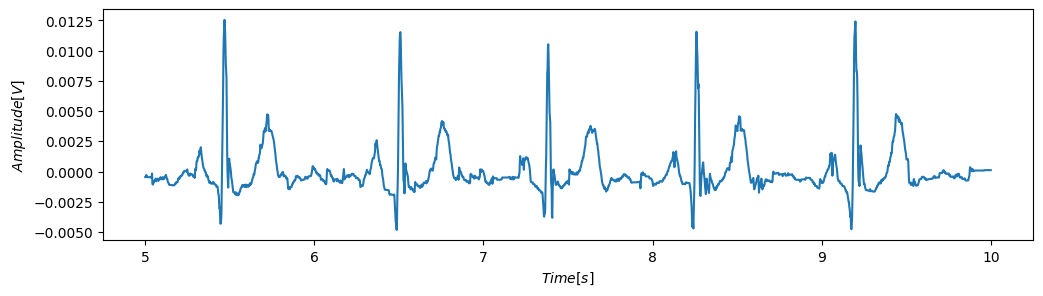

In [56]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, resample_poly, spectrogram

signal, fs = sf.read("xsmirn02.wav")

selected_segment = signal[5*fs:10*fs]

time_axis = np.linspace(5, 10, len(selected_segment))
plt.figure(figsize=(12,3))
plt.plot(time_axis, selected_segment)
plt.xlabel("$Time[s]$")
plt.ylabel("$Amplitude[V]$")
plt.show()

b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

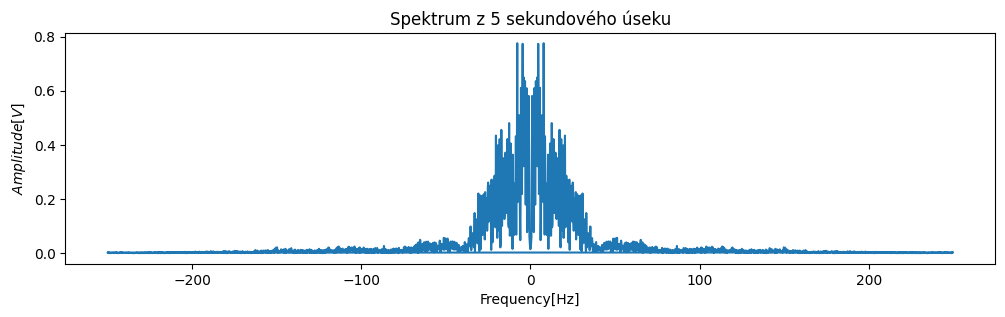

In [57]:
fft_result = np.fft.fft(selected_segment)
fft_freq = np.fft.fftfreq(len(selected_segment), 1/fs)


plt.figure(figsize=(12,3))
plt.plot(fft_freq, np.abs(fft_result))
plt.title("Spektrum z 5 sekundového úseku")
plt.xlabel("Frequency[Hz]")
plt.ylabel("$Amplitude[V]$")
plt.show()

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Elektrickým šumem v okolí(v Evropě ten šum obvykle při 50Hz)

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [58]:
resampled_fs = 100
 #antialiasing a převzorkování
resampled_signal = resample_poly(signal, resampled_fs, fs)

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

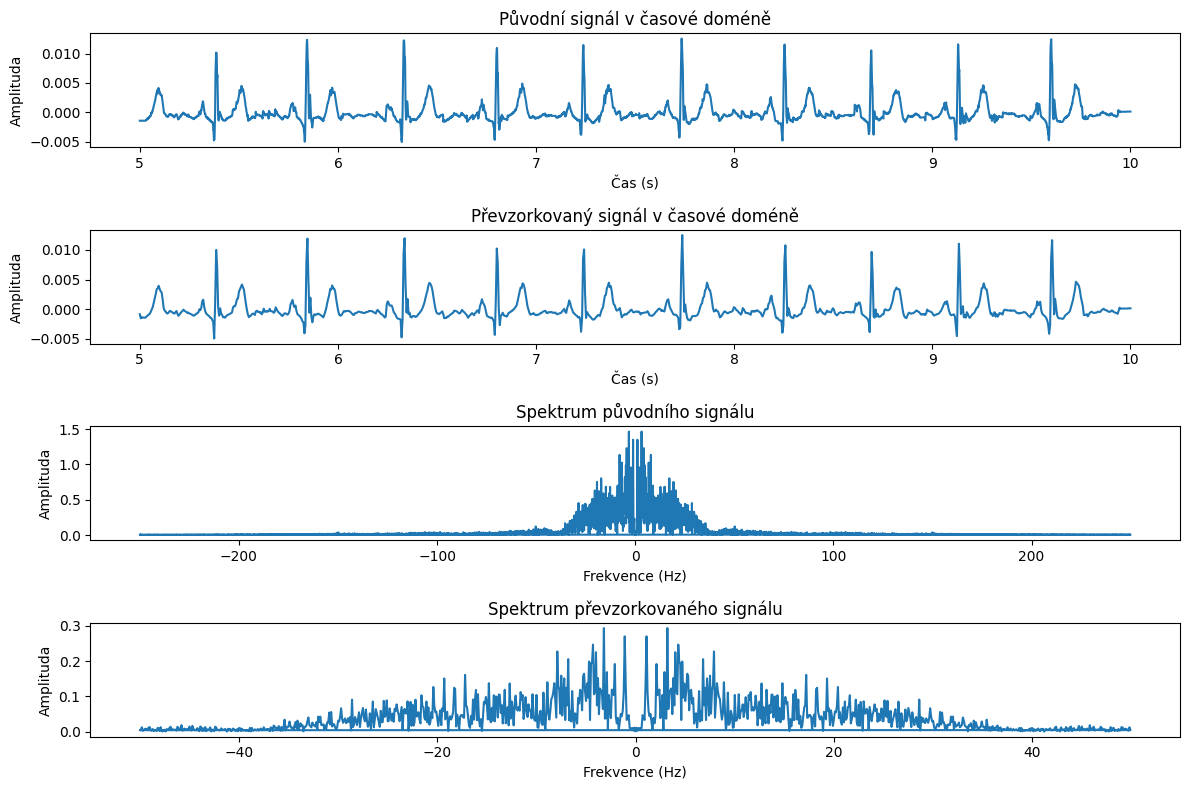

In [67]:
time_axis_original = np.linspace(5, 10, len(signal))
time_axis_resampled = np.linspace(5, 10, len(resampled_signal))

# Zobrazení původního
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time_axis_original, signal)
plt.title("Původní signál v časové doméně")
plt.xlabel("Čas (s)")
plt.ylabel("Amplituda")

fft_original = np.fft.fft(signal)
fft_freq_original = np.fft.fftfreq(len(signal), 1/fs)

plt.subplot(4, 1, 3)
plt.plot(fft_freq_original, np.abs(fft_original))
plt.title("Spektrum původního signálu")
plt.xlabel("Frekvence (Hz)")
plt.ylabel("Amplituda")

# Zobrazení převzorkovaného signálu v časové doméně
plt.subplot(4, 1, 2)
plt.plot(time_axis_resampled, resampled_signal)
plt.title("Převzorkovaný signál v časové doméně")
plt.xlabel("Čas (s)")
plt.ylabel("Amplituda")

fft_resampled = np.fft.fft(resampled_signal)
fft_freq_resampled = np.fft.fftfreq(len(resampled_signal), 1/resampled_fs)

plt.subplot(4, 1, 4)
plt.plot(fft_freq_resampled, np.abs(fft_resampled))
plt.title("Spektrum převzorkovaného signálu")
plt.xlabel("Frekvence (Hz)")
plt.ylabel("Amplituda")

plt.tight_layout()
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

In [60]:
def signal_filter(signal):
  lowcut = 10.0
  highcut = 20.0

  # Vytvoření spektrální masky
  frequency_mask = np.ones_like(signal)
  nyquist = 0.5 * fs
  low_index = int(lowcut / nyquist * len(frequency_mask))
  high_index = int(highcut / nyquist * len(frequency_mask))
  frequency_mask[:low_index] = 0
  frequency_mask[high_index:] = 0

  return np.fft.ifft(np.fft.fft(signal) * frequency_mask).real


  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


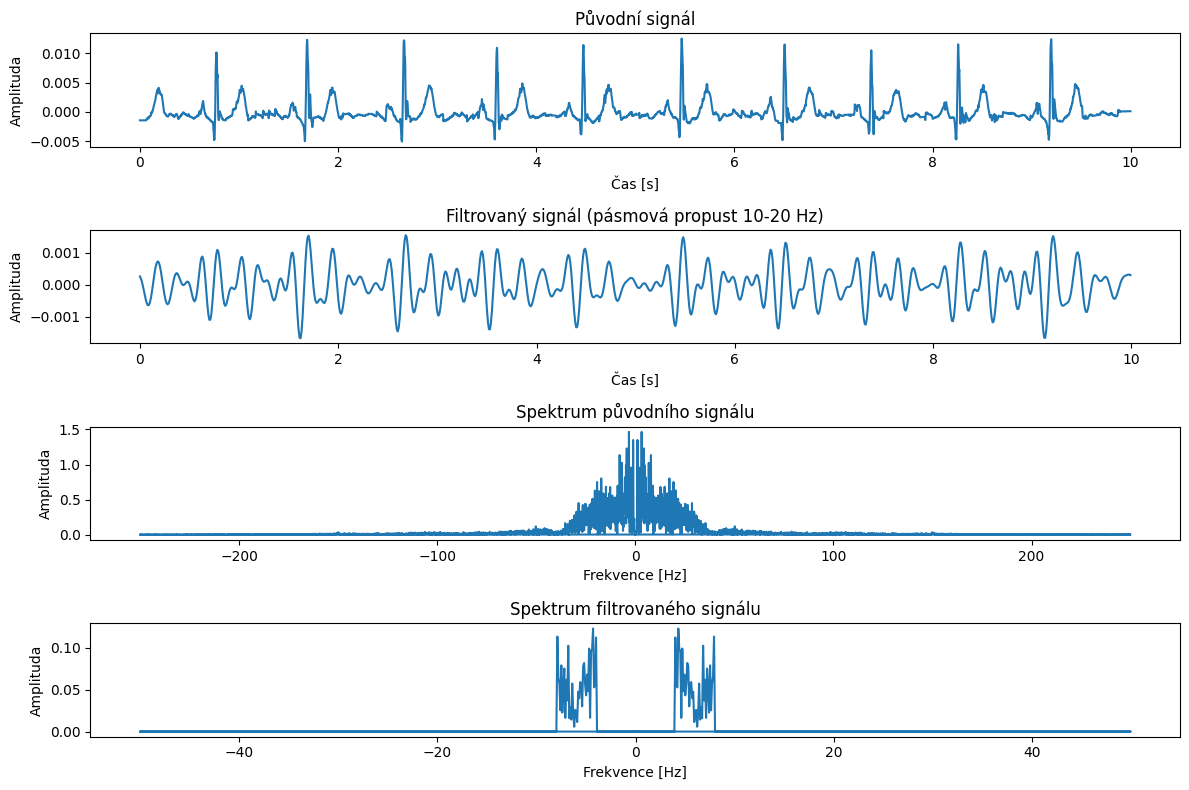

In [68]:
filtered_signal = signal_filter(resampled_signal)

# Zobrazení původního a filtrovaného signálu v časové doméně
fil_time_axis = np.arange(len(filtered_signal)) / resampled_fs
time_axis = np.arange(len(signal)) / fs

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time_axis, signal)
plt.title('Původní signál')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')

plt.subplot(4, 1, 2)
plt.plot(fil_time_axis, filtered_signal)
plt.title('Filtrovaný signál (pásmová propust 10-20 Hz)')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')

# Výpočet a zobrazení spekter
fft_original = np.fft.fft(signal)
fft_filtered = np.fft.fft(filtered_signal)

fft_freq_original = np.fft.fftfreq(len(signal), 1/fs)
fft_freq_filtered = np.fft.fftfreq(len(filtered_signal), 1/resampled_fs)

plt.subplot(4, 1, 3)
plt.plot(fft_freq_original, np.abs(fft_original))
plt.title('Spektrum původního signálu')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')

plt.subplot(4, 1, 4)
plt.plot(fft_freq_filtered, np.abs(fft_filtered))
plt.title('Spektrum filtrovaného signálu')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Amplituda')

plt.tight_layout()
plt.show()

  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?




*Zde napište vaše řešení.*

### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.


   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

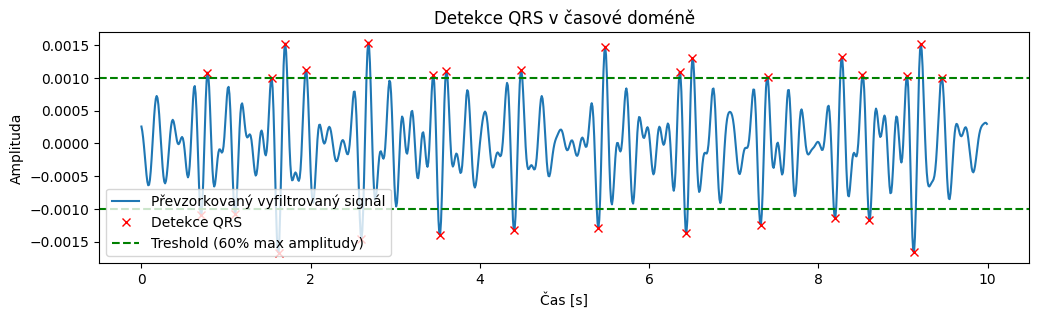

In [62]:
# qrs_signal_tresh = signal#[1*fs:2*fs]
qrs_signal_tresh = filtered_signal#[1*resampled_fs:2*resampled_fs]

max_amplitude = np.max(np.abs(qrs_signal_tresh))

threshold_percentage = 60
threshold = threshold_percentage / 100 * max_amplitude

# Detekce QRS překračující prah
qrs_indices, _ = find_peaks(np.abs(qrs_signal_tresh), height=threshold)
time_axis = np.arange(len(qrs_signal_tresh)) / resampled_fs

plt.figure(figsize=(12, 3))
plt.plot(time_axis, qrs_signal_tresh, label='Převzorkovaný vyfiltrovaný signál')
plt.plot(time_axis[qrs_indices], qrs_signal_tresh[qrs_indices], 'rx', label='Detekce QRS')
plt.axhline(y=threshold, color='g', linestyle='--', label=f'Treshold ({threshold_percentage}% max amplitudy)')
plt.axhline(y=-threshold, color='g', linestyle='--')
plt.title('Detekce QRS v časové doméně')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

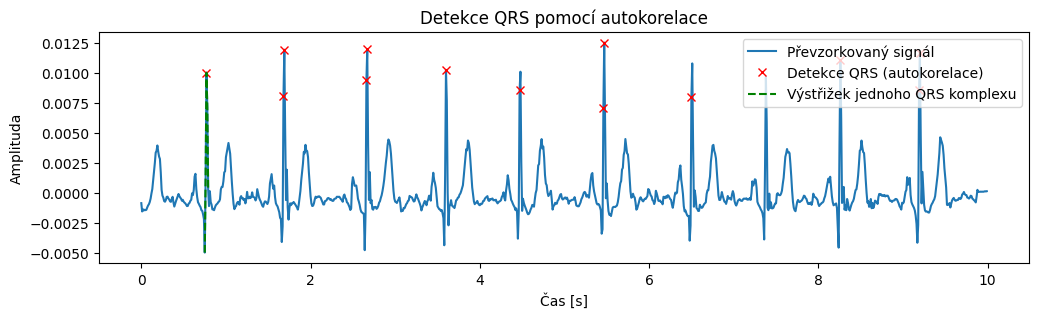

In [69]:

qrs_start = int(0.755*resampled_fs)
qrs_end = int(0.805*resampled_fs)
qrs_signal_korel = resampled_signal[qrs_start:qrs_end]

autocorrelation = np.correlate(resampled_signal, qrs_signal_korel, mode='same')

# Normalizace autokorelace
autocorrelation /= np.max(autocorrelation)

threshold = 0.80
qrs_indices_correlation = np.where(autocorrelation > threshold)[0]

time_axis_correlation = np.arange(len(resampled_signal)) / resampled_fs

plt.figure(figsize=(12, 3))
plt.plot(time_axis_correlation, resampled_signal, label='Převzorkovaný signál')
plt.plot(time_axis_correlation[qrs_indices_correlation], resampled_signal[qrs_indices_correlation], 'rx', label='Detekce QRS (autokorelace)')
plt.plot(time_axis_correlation[qrs_start:qrs_end], qrs_signal_korel, 'g--', label='Výstřižek jednoho QRS komplexu')
plt.title('Detekce QRS pomocí autokorelace')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.show()

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

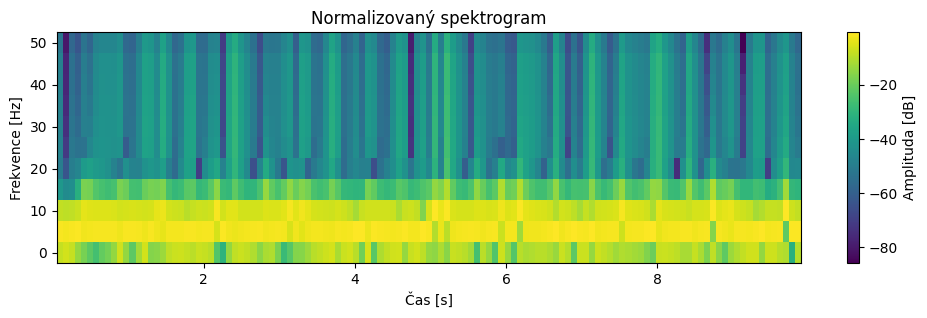

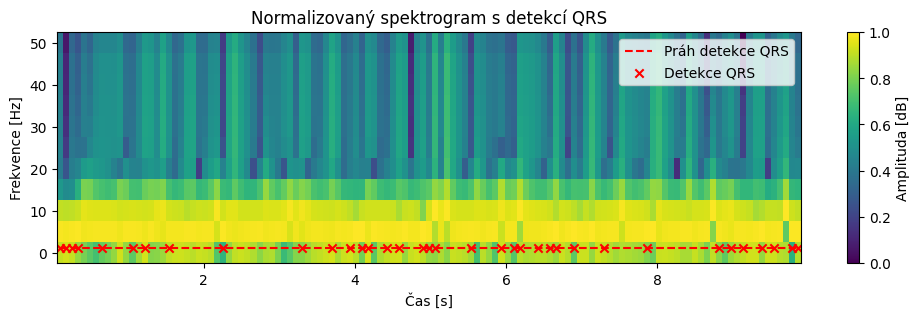

In [70]:
window_len = int(0.2 * resampled_fs)  # délka okna 200 ms
hop_size = int(0.12 * resampled_fs)  # posun okna 120 ms

# Výpočet spektrogramu
frequencies, times, Sxx = spectrogram(filtered_signal, fs=resampled_fs, window='hamming', nperseg=window_len, noverlap=hop_size, scaling='spectrum')

# Normalizace spektrogramu v čase
Sxx_normalized = Sxx / np.sum(Sxx, axis=0)

# Zobrazení spektrogramu
plt.figure(figsize=(12, 3))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_normalized), shading='auto')
plt.title('Normalizovaný spektrogram')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvence [Hz]')
plt.colorbar(label='Amplituda [dB]')
plt.show()

# Spočítání sumy energie spektra pro jednotlivé časové biny
energy_sum = np.sum(Sxx_normalized, axis=0)

qrs_energy_threshold = energy_sum[int(0.755*resampled_fs):int(0.805*resampled_fs)].max()

qrs_indices_energy = np.where(energy_sum >= qrs_energy_threshold)[0]

# Vykreslení spektrogramu a detekce QRS
plt.figure(figsize=(12, 3))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_normalized), shading='auto')
plt.plot(times, qrs_energy_threshold * np.ones_like(times), 'r--', label='Práh detekce QRS')
plt.scatter(times[qrs_indices_energy], qrs_energy_threshold * np.ones_like(qrs_indices_energy), color='red', marker='x', label='Detekce QRS')
plt.title('Normalizovaný spektrogram s detekcí QRS')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvence [Hz]')
plt.colorbar(label='Amplituda [dB]')
plt.legend()
plt.show()

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

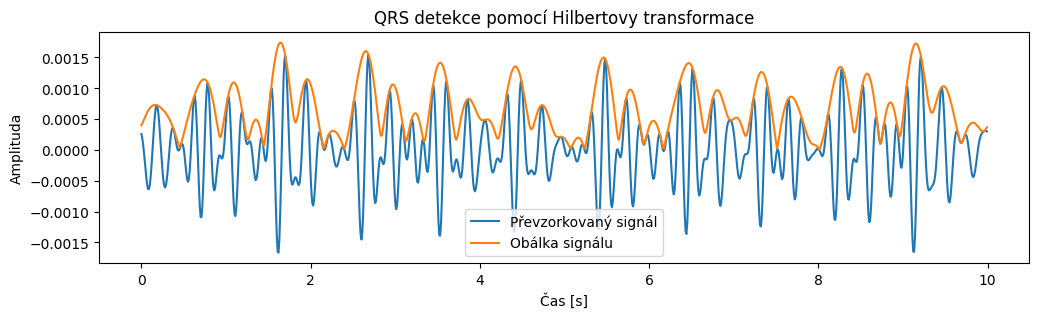

In [65]:
def hilbert_transform(signal):
    fft_result = np.fft.fft(signal)

    # Vynulujeme pravou symetrickou část spektra
    fft_result[int(len(fft_result)/2)+1:] = 0

    # Levou část spektra vynásobíme 2 (kromě prvního a prostředního binu při sudém počtu frekvenčních binů)
    if len(fft_result) % 2 == 0:
        fft_result[1:int(len(fft_result)/2)] *= 2
    else:
        fft_result[1:] *= 2

    # Provedeme zpětnou FFT
    inverse_fft = np.fft.ifft(fft_result)

    return inverse_fft


hilbert_result = hilbert_transform(filtered_signal)
envelope = np.abs(hilbert_result)
time_axis = np.arange(len(resampled_signal)) / resampled_fs

plt.figure(figsize=(12, 3))
plt.plot(time_axis, filtered_signal, label='Převzorkovaný signál')
plt.plot(time_axis, envelope, label='Obálka signálu')
plt.title('QRS detekce pomocí Hilbertovy transformace')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.show()

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

*Zde napište vaše řešení.*

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

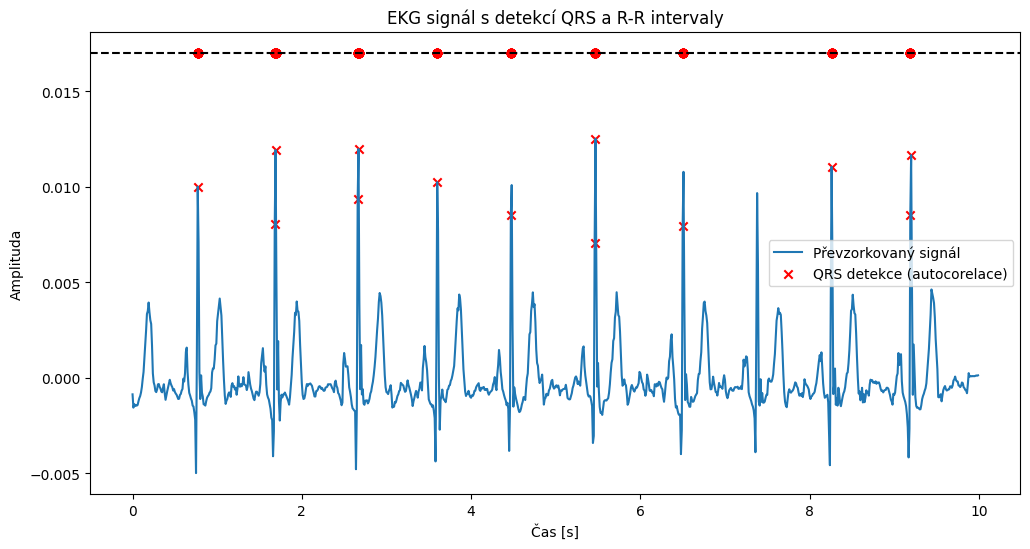

In [66]:
# qrs_indices_correlation resampled_fs

def calculate_rr_intervals(qrs_indices):
    rr_intervals = np.diff(qrs_indices) / resampled_fs
    rr_times = qrs_indices[:-1] / resampled_fs
    return rr_times, rr_intervals

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(resampled_signal)) / resampled_fs, resampled_signal, label='Převzorkovaný signál')


rr_times_correlation, rr_intervals_correlation = calculate_rr_intervals(qrs_indices_correlation)
plt.scatter(qrs_indices_correlation / resampled_fs, resampled_signal[qrs_indices_correlation], color='red', marker='x', label='QRS detekce (autocorelace)')
for time, interval in zip(rr_times_correlation, rr_intervals_correlation):
    plt.scatter(rr_times_correlation, [0.017]*len(rr_times_correlation), color='red', marker='o')

plt.axhline(y=0.017, color='black', linestyle='--')

plt.title('EKG signál s detekcí QRS a R-R intervaly')
plt.xlabel('Čas [s]')
plt.ylabel('Amplituda')
plt.legend()

plt.show()